In [90]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

In [91]:
df = pd.read_csv('Resources/US_French_Cab_Bordeauxs.csv')
df

,ID,alcohol,category,country,description,designation,price,rating,rating_bin,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,1,13.2,Red,US,This is among winemaker Cathy Corison's finest...,Kronos Vineyard,185.0,95,91-100,California,Napa,St. Helena,Corison 2015 Kronos Vineyard Cabernet Sauvigno...,https://www.winemag.com/buying-guide/corison-2...,Cabernet Sauvignon,2015,Corison
1,52,14.2,Red,US,This bottling by industry veterans John and He...,NaN,35.0,94,91-100,California,Central Coast,Paso Robles,Falcone 2016 Cabernet Sauvignon (Paso Robles),https://www.winemag.com/buying-guide/falcone-2...,Cabernet Sauvignon,2016,Falcone
2,128,14.5,Red,US,"Inky in the glass, this rich and structured bo...",Reserve,56.0,94,91-100,California,Central Coast,Paso Robles,Daou 2016 Reserve Cabernet Sauvignon (Paso Rob...,https://www.winemag.com/buying-guide/daou-2016...,Cabernet Sauvignon,2016,Daou
3,136,14.5,Red,US,"This wine is pretty, floral and compact in red...",NaN,102.0,95,91-100,California,Napa,Napa Valley,Alpha Omega 2015 Cabernet Sauvignon (Napa Valley),https://www.winemag.com/buying-guide/alpha-ome...,Cabernet Sauvignon,2015,Alpha Omega
4,161,14.7,Red,US,The producer's new Nomad collection includes b...,Nomad Beckstoffer Missouri Hopper Vineyard,175.0,95,91-100,California,Napa,Napa Valley,Stewart 2016 Nomad Beckstoffer Missouri Hopper...,https://www.winemag.com/buying-guide/stewart-2...,Cabernet Sauvignon,2016,Stewart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18051,237904,14.6,Red,US,Hard to explain why the winery is only now rel...,NaN,28.0,82,85-90,California,Central Coast,Santa Barbara County,Tin House 2003 Cabernet Sauvignon (Santa Barba...,https://www.winemag.com/buying-guide/tin-house...,Cabernet Sauvignon,2003,Tin House
18052,237909,13.0,Red,France,"A raw-edged wine, with dusty tannins and black...",Mouton Cadet,9.0,82,85-90,Bordeaux,Bordeaux,NaN,Baron Philippe de Rothschild 2005 Mouton Cadet...,https://www.winemag.com/buying-guide/baron-phi...,Bordeaux-style Red Blend,2005,Baron Philippe de Rothschild
18053,237910,13.8,Red,US,The blazing vintage took its toll on this high...,NaN,42.0,82,85-90,California,Sierra Foothills,Sierra Foothills,Peters Family 2004 Cabernet Sauvignon (Sierra ...,https://www.winemag.com/buying-guide/peters-fa...,Cabernet Sauvignon,2004,Peters Family
18054,237911,14.8,Red,US,"A brittle, peppery and ultimately disappointin...",Conn Creek Estate Vineyard,45.0,82,85-90,California,Napa,Rutherford,Conn Creek 2004 Conn Creek Estate Vineyard Cab...,https://www.winemag.com/buying-guide/conn-cree...,Cabernet Sauvignon,2004,Conn Creek


In [92]:
df = df.drop(['ID', 'alcohol', 'category', 'description', 'designation', 'rating', 'title', 'url', 'varietal', 'vintage','winery'], axis=1)
df.head()


,country,price,rating_bin,region,subregion,subsubregion
0,US,185.0,91-100,California,Napa,St. Helena
1,US,35.0,91-100,California,Central Coast,Paso Robles
2,US,56.0,91-100,California,Central Coast,Paso Robles
3,US,102.0,91-100,California,Napa,Napa Valley
4,US,175.0,91-100,California,Napa,Napa Valley


In [93]:
df = df.dropna(subset=['subsubregion'])

In [94]:
X_df = pd.DataFrame(df)
X_df['subregion'] = X_df['subregion'].astype(str)

In [95]:
X = X_df.drop("rating_bin", axis=1)
y = df["rating_bin"]

In [96]:
X= X.apply(LabelEncoder().fit_transform)
X

,country,price,region,subregion,subsubregion
0,0,140,0,8,126
1,0,39,0,1,80
2,0,62,0,1,80
3,0,105,0,8,67
4,0,137,0,8,67
...,...,...,...,...,...
18049,0,5,0,1,80
18051,0,31,0,1,101
18053,0,46,0,13,110
18054,0,51,0,8,93


In [97]:
X = X.values.astype("float32")
print(X)
# y = y.values.astype("float32")

[[  0. 140.   0.   8. 126.]
 [  0.  39.   0.   1.  80.]
 [  0.  62.   0.   1.  80.]
 ...
 [  0.  46.   0.  13. 110.]
 [  0.  51.   0.   8.  93.]
 [  0.  16.   0.   1.  80.]]


In [98]:
le = LabelEncoder()
le.fit(y)
print(y)
encoded_y = le.transform(y)
encoded_y
le.inverse_transform(np.arange(2))

0        91-100
1        91-100
2        91-100
3        91-100
4        91-100
          ...  
18049     85-90
18051     85-90
18053     85-90
18054     85-90
18055     85-90
Name: rating_bin, Length: 13804, dtype: object


array(['85-90', '91-100'], dtype=object)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [124]:
le2 = LabelEncoder()
le2.fit(y_train)
encoded_y_train = le2.transform(y_train)
encoded_y_test = le2.transform(y_test)
encoded_y_test
# len(encoded_y_train)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [101]:
X_train, x_val, y_train, y_val = train_test_split(X_train, encoded_y_train, random_state=42)

In [102]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print(len(y_train_categorical))
len(X_train)

7764


7764

In [103]:
scaler_model = StandardScaler()

In [104]:
X_scaler = scaler_model.fit(X_train)

In [105]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [106]:
input_dims = X_train.shape[1]
input_dims

5

In [204]:
model = Sequential()
model.add(Dense(8, activation = 'tanh', input_dim=(input_dims)))
# model.add(Dense(6, activation = 'relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_306"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_715 (Dense)            (None, 8)                 48        
_________________________________________________________________
dense_716 (Dense)            (None, 2)                 18        
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [205]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [206]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=300, batch_size=10,  verbose=1, validation_split=0.2)

Train on 6211 samples, validate on 1553 samples
Epoch 1/300
6211/6211 [==============================] - 1s 120us/step - loss: 0.5644 - accuracy: 0.7026 - val_loss: 0.5133 - val_accuracy: 0.7431
Epoch 2/300
6211/6211 [==============================] - 1s 90us/step - loss: 0.5103 - accuracy: 0.7443 - val_loss: 0.5051 - val_accuracy: 0.7386
Epoch 3/300
6211/6211 [==============================] - 0s 80us/step - loss: 0.5074 - accuracy: 0.7432 - val_loss: 0.5034 - val_accuracy: 0.7418
Epoch 4/300
6211/6211 [==============================] - 1s 82us/step - loss: 0.5064 - accuracy: 0.7426 - val_loss: 0.5026 - val_accuracy: 0.7424
Epoch 5/300
6211/6211 [==============================] - 1s 82us/step - loss: 0.5055 - accuracy: 0.7438 - val_loss: 0.5024 - val_accuracy: 0.7450
Epoch 6/300
6211/6211 [==============================] - 1s 83us/step - loss: 0.5049 - accuracy: 0.7427 - val_loss: 0.5013 - val_accuracy: 0.7450
Epoch 7/300
6211/6211 [==============================] - 1s 82us/step - los

6211/6211 [==============================] - 1s 131us/step - loss: 0.4989 - accuracy: 0.7466 - val_loss: 0.4983 - val_accuracy: 0.7482
Epoch 57/300
6211/6211 [==============================] - 1s 120us/step - loss: 0.4988 - accuracy: 0.7471 - val_loss: 0.4988 - val_accuracy: 0.7450
Epoch 58/300
6211/6211 [==============================] - 1s 124us/step - loss: 0.4988 - accuracy: 0.7456 - val_loss: 0.4989 - val_accuracy: 0.7476
Epoch 59/300
6211/6211 [==============================] - 1s 131us/step - loss: 0.4989 - accuracy: 0.7474 - val_loss: 0.4983 - val_accuracy: 0.7463
Epoch 60/300
6211/6211 [==============================] - 1s 135us/step - loss: 0.4989 - accuracy: 0.7493 - val_loss: 0.4982 - val_accuracy: 0.7450
Epoch 61/300
6211/6211 [==============================] - 1s 119us/step - loss: 0.4987 - accuracy: 0.7471 - val_loss: 0.4984 - val_accuracy: 0.7482
Epoch 62/300
6211/6211 [==============================] - 1s 116us/step - loss: 0.4986 - accuracy: 0.7459 - val_loss: 0.4997 

6211/6211 [==============================] - 1s 83us/step - loss: 0.4975 - accuracy: 0.7479 - val_loss: 0.4990 - val_accuracy: 0.7495
Epoch 112/300
6211/6211 [==============================] - 1s 87us/step - loss: 0.4975 - accuracy: 0.7467 - val_loss: 0.4987 - val_accuracy: 0.7502
Epoch 113/300
6211/6211 [==============================] - 1s 96us/step - loss: 0.4979 - accuracy: 0.7461 - val_loss: 0.4984 - val_accuracy: 0.7489
Epoch 114/300
6211/6211 [==============================] - 1s 94us/step - loss: 0.4978 - accuracy: 0.7461 - val_loss: 0.4985 - val_accuracy: 0.7495
Epoch 115/300
6211/6211 [==============================] - 1s 82us/step - loss: 0.4977 - accuracy: 0.7477 - val_loss: 0.4984 - val_accuracy: 0.7482
Epoch 116/300
6211/6211 [==============================] - 1s 95us/step - loss: 0.4973 - accuracy: 0.7480 - val_loss: 0.4991 - val_accuracy: 0.7450
Epoch 117/300
6211/6211 [==============================] - 1s 96us/step - loss: 0.4975 - accuracy: 0.7474 - val_loss: 0.4987 -

Epoch 166/300
6211/6211 [==============================] - 1s 116us/step - loss: 0.4967 - accuracy: 0.7463 - val_loss: 0.4986 - val_accuracy: 0.7444
Epoch 167/300
6211/6211 [==============================] - 1s 115us/step - loss: 0.4969 - accuracy: 0.7475 - val_loss: 0.4988 - val_accuracy: 0.7444
Epoch 168/300
6211/6211 [==============================] - 1s 115us/step - loss: 0.4968 - accuracy: 0.7448 - val_loss: 0.4985 - val_accuracy: 0.7431
Epoch 169/300
6211/6211 [==============================] - 1s 126us/step - loss: 0.4965 - accuracy: 0.7474 - val_loss: 0.4992 - val_accuracy: 0.7476
Epoch 170/300
6211/6211 [==============================] - 1s 114us/step - loss: 0.4968 - accuracy: 0.7463 - val_loss: 0.4985 - val_accuracy: 0.7450
Epoch 171/300
6211/6211 [==============================] - 1s 105us/step - loss: 0.4967 - accuracy: 0.7488 - val_loss: 0.4986 - val_accuracy: 0.7457
Epoch 172/300
6211/6211 [==============================] - 1s 115us/step - loss: 0.4966 - accuracy: 0.7475

Epoch 221/300
6211/6211 [==============================] - 1s 114us/step - loss: 0.4959 - accuracy: 0.7475 - val_loss: 0.4987 - val_accuracy: 0.7437
Epoch 222/300
6211/6211 [==============================] - 1s 110us/step - loss: 0.4962 - accuracy: 0.7475 - val_loss: 0.4985 - val_accuracy: 0.7431
Epoch 223/300
6211/6211 [==============================] - 1s 111us/step - loss: 0.4961 - accuracy: 0.7493 - val_loss: 0.4991 - val_accuracy: 0.7405
Epoch 224/300
6211/6211 [==============================] - 1s 104us/step - loss: 0.4956 - accuracy: 0.7467 - val_loss: 0.5002 - val_accuracy: 0.7392
Epoch 225/300
6211/6211 [==============================] - 1s 104us/step - loss: 0.4963 - accuracy: 0.7464 - val_loss: 0.4984 - val_accuracy: 0.7431
Epoch 226/300
6211/6211 [==============================] - 1s 117us/step - loss: 0.4957 - accuracy: 0.7490 - val_loss: 0.5001 - val_accuracy: 0.7411
Epoch 227/300
6211/6211 [==============================] - 1s 108us/step - loss: 0.4959 - accuracy: 0.7479

6211/6211 [==============================] - 1s 106us/step - loss: 0.4953 - accuracy: 0.7479 - val_loss: 0.4978 - val_accuracy: 0.7457
Epoch 277/300
6211/6211 [==============================] - 1s 109us/step - loss: 0.4952 - accuracy: 0.7474 - val_loss: 0.4985 - val_accuracy: 0.7444
Epoch 278/300
6211/6211 [==============================] - 1s 111us/step - loss: 0.4951 - accuracy: 0.7482 - val_loss: 0.4979 - val_accuracy: 0.7424
Epoch 279/300
6211/6211 [==============================] - 1s 133us/step - loss: 0.4953 - accuracy: 0.7471 - val_loss: 0.4980 - val_accuracy: 0.7444
Epoch 280/300
6211/6211 [==============================] - 1s 220us/step - loss: 0.4953 - accuracy: 0.7482 - val_loss: 0.4985 - val_accuracy: 0.7450
Epoch 281/300
6211/6211 [==============================] - 1s 155us/step - loss: 0.4950 - accuracy: 0.7474 - val_loss: 0.4981 - val_accuracy: 0.7437
Epoch 282/300
6211/6211 [==============================] - 1s 138us/step - loss: 0.4952 - accuracy: 0.7482 - val_loss: 0

In [199]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5112020899267757, Accuracy: 0.7348594665527344


In [200]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = le.inverse_transform(encoded_predictions)

In [201]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {le.inverse_transform(list(y_test[:5]))}")
# print(f"X Values: {list(X_test[:5])}")


Predicted classes: ['91-100' '91-100' '85-90' '85-90' '91-100']
Actual Labels: ['85-90' '91-100' '91-100' '85-90' '85-90']


In [113]:
# model.save('modelSS.h5')

In [202]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


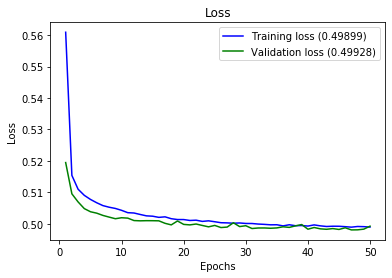

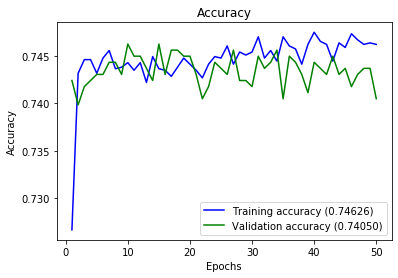

In [203]:
plot_history(history)

In [189]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


In [190]:
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=True):

    # 1. Transform one-hot encoded y_true into their class number
#     if not binary:
#         y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [191]:
print(x_val)
y_val

[[  0. 120.   0.   8.  67.]
 [  0.  39.   3.   3.  24.]
 [  0. 137.   0.   8.  77.]
 ...
 [  0.  56.   0.   8.   6.]
 [  0.  33.   3.   3. 139.]
 [  0.  22.   0.   8.  67.]]


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Accuracy : 0.3514870606411742

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000      1679
           1    0.35149   1.00000   0.52015       910

    accuracy                        0.35149      2589
   macro avg    0.17574   0.50000   0.26007      2589
weighted avg    0.12354   0.35149   0.18283      2589

[[   0 1679]
 [   0  910]]


C:\Users\koegs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


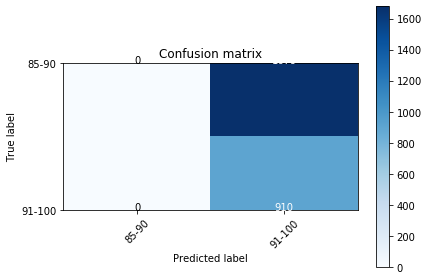

In [192]:
full_multiclass_report(model,
                       x_val,
                       y_val,
                       le.inverse_transform(np.arange(2)))

In [193]:
print(X_test_scaled)
y_test

[[ 0.          0.72242665 -0.49043316  0.30372262  1.5440887 ]
 [ 0.          1.2612134  -0.49043316  0.30372262  0.69483626]
 [ 0.         -0.654473   -0.49043316  0.30372262  0.02572829]
 ...
 [ 0.          0.00404422 -0.49043316 -1.307003    1.0551251 ]
 [ 0.         -0.654473    2.1205769  -0.84679574 -1.0808734 ]
 [ 0.         -0.7742034  -0.49043316  1.6843446  -1.6727766 ]]


array([0, 1, 1, ..., 1, 0, 0])

Accuracy : 0.36771950159374095

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000      2182
           1    0.36772   1.00000   0.53771      1269

    accuracy                        0.36772      3451
   macro avg    0.18386   0.50000   0.26886      3451
weighted avg    0.13522   0.36772   0.19773      3451

[[   0 2182]
 [   0 1269]]


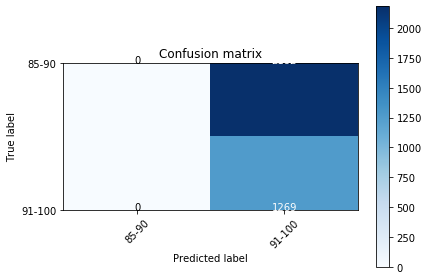

In [194]:
full_multiclass_report(model,
                       X_test_scaled,
                       y_test,
                       le.inverse_transform(np.arange(2)))

In [195]:
# GridSearch
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(5,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))
            
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

param_grid = {'dense_layers': [[4],[8],[8,8]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[50,100],
              'batch_size':[10,16]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

grid_results = grid.fit(X_train_scaled,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

C:\Users\koegs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\koegs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\koegs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Parameters of the best model: 
{'activation': 'tanh', 'batch_size': 10, 'dense_layers': [8], 'epochs': 50, 'optimizer': 'adam'}
